
# Post-processing: plot and analyze the results

In [1]:
import meshio
import numpy as np
import glob, os

import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LogNorm
from matplotlib import mathtext
import math
from scipy import stats
from tkinter import Tcl

#Plot Setup
font = {'size':12}
plt.rc('font', **font)
plt.rc('font', family='serif')
plt.rc('text', usetex=False)

## Measure total Energy

In [10]:
# Import snapshots
snapshot_dir = ''
#snapshot_dir = 'run_const_dt/'
files = glob.glob(snapshot_dir + "particles-*.vtu")
# Sort the snapshots
files = Tcl().call('lsort', '-dict', files)

# Simulation parameters
E_ini = 1.11362
time_step_sim = 1e-3
snapshot_rate = 25
SUN_X = 0.5
SUN_Y = 0.55

# Initialize arrays
E_dif_all = np.zeros( len(files) )
t_all = np.zeros( len(files) )

# Read snapshots and gather data
for N_snapshot, file in enumerate(files, start=0):
    
    print("N_snapshot: ", N_snapshot)
    time = N_snapshot * snapshot_rate * time_step_sim
    t_all[N_snapshot] = time
    
    print('Reading snapshot: ' + file )
    print("time of simulation = ", time)
    print("********************************************")

    mesh = meshio.read( file )
    print(mesh.point_data_to_sets)
    print("********************************************")

    # Read coordinates
    pos = mesh.point_data["x"]
    x = pos[:,0]
    y = pos[:,1]

    # Read energy
    E_tot = mesh.point_data["energyTot"][:,0]
    E_kin = mesh.point_data["energyKin"][:,0]
    E_pot = mesh.point_data["energyPot"][:,0]
    E_tot = np.sum(E_tot)
    E_dif = (E_tot - E_ini) / E_ini
    E_dif_all[N_snapshot] = E_dif

    print("Measure energy conservation:")
    print("Initial E = ", E_ini)
    print("Kinetic E = ", E_kin)
    print("Potential E = ", E_pot)
    print("Total E = ", E_tot)
    print("Relative Energy difference = ", E_dif )
    print("********************************************")

print("Done reading all snapshots. Total= ", N_snapshot )

N_snapshot:  0
Reading snapshot: particles-0.vtu
time of simulation =  0.0
********************************************
<bound method Mesh.point_data_to_sets of <meshio mesh object>
  Number of points: 1
  Number of cells:
    vertex: 1
  Point data: x, cut-off-radius, association, v, energyKin, energyPot, energyTot>
********************************************
Measure energy conservation:
Initial E =  1.11362
Kinetic E =  [1.2341]
Potential E =  [2.34772]
Total E =  1.11362
Relative Energy difference =  3.8434028902163246e-08
********************************************
N_snapshot:  1
Reading snapshot: particles-1.vtu
time of simulation =  0.025
********************************************
<bound method Mesh.point_data_to_sets of <meshio mesh object>
  Number of points: 1
  Number of cells:
    vertex: 1
  Point data: x, cut-off-radius, association, v, energyKin, energyPot, energyTot>
********************************************
Measure energy conservation:
Initial E =  1.11362
Kineti

<bound method Mesh.point_data_to_sets of <meshio mesh object>
  Number of points: 1
  Number of cells:
    vertex: 1
  Point data: x, cut-off-radius, association, v, energyKin, energyPot, energyTot>
********************************************
Measure energy conservation:
Initial E =  1.11362
Kinetic E =  [1.18086]
Potential E =  [2.29418]
Total E =  1.11332
Relative Energy difference =  -0.0002693979821627219
********************************************
N_snapshot:  185
Reading snapshot: particles-185.vtu
time of simulation =  4.625
********************************************
<bound method Mesh.point_data_to_sets of <meshio mesh object>
  Number of points: 1
  Number of cells:
    vertex: 1
  Point data: x, cut-off-radius, association, v, energyKin, energyPot, energyTot>
********************************************
Measure energy conservation:
Initial E =  1.11362
Kinetic E =  [1.1658]
Potential E =  [2.2791]
Total E =  1.1133
Relative Energy difference =  -0.0002873818192386825
****

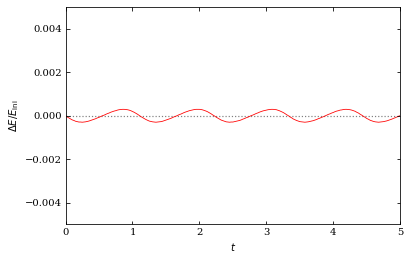

Test passed!


In [11]:
# Plot radial profile
fig = plt.figure(figsize=(6, 4)) 
gs = gridspec.GridSpec(1,1) 

ax0 = plt.subplot(gs[0])
plt.plot(t_all, E_dif_all, c='r', lw=0.8, zorder=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$\Delta E/E_{\rm ini}$')
plt.margins(0.05, 0.1)
plt.tick_params(direction='in', top=True, right=True)
plt.axhline(0, c='gray', ls=':', lw=1.2, zorder=-49 )
plt.xlim(0, t_all.max())
plt.ylim(-0.005, 0.005 )

plt.show()
#fig.savefig('energy_conservation_profile.pdf')
plt.close()

# Check energy conservation
E_tolerance = 1e-2

E_min = E_dif_all.min()
E_max = E_dif_all.max()
E_mean= np.mean(E_dif_all)

assert abs(E_min) < E_tolerance, f"Energy not conserved. E_min: {E_min}"
assert abs(E_mean)< E_tolerance, f"Energy not conserved. E_mean: {E_min}"
assert abs(E_max) < E_tolerance, f"Energy not conserved. E_max: {E_max}"

# @TODO test if there is any long-term drift, e.g. of the mean.

print('Test passed!')

In [12]:
E_dif_all.mean()

-2.7212127908516467e-05

In [34]:
E_dif_all.min()

-0.0003052586096653814

In [40]:
E_dif_all.max()

0.00028735164064722514

In [39]:
mesh = meshio.read( "particles.pvd")


ReadError: Could not deduce file format from path 'particles.pvd'.